# A survey of optimisation methods

## Marc Garcia - @datapythonista

## Agenda

- Optimisation is everywhere
- Components of an optimisation problem
- Optimisation problems:
  - Hello world
  - Linear regression
  - Logistic regression
  - Neural networks
  - Hyperparameter tunning
  - Clustering
  - Knapsack problem
  - Travelling salesman problem
- Summary
- Resources

## Why optimisation?

Optimisation is **everywhere**

- I came to Cambridge minimising commute time and cost

- I deliver this talk maximising the content I can present on a given time

- Every company's goal is to maximise the top or bottom lines of their P&L

- Almost everything in **machine learning** is a simple problem and an optimisation problem

# Components of an optimisation problem

- Variables
- Objective function
- Constraints

## Optimisation "hello world"

<img alt="" src="img/coins.png" style="float: right;"/>

- We have **3 coins**
- With every coin we can buy **20 sweets**
- We want to buy as many sweets as possible

**Variables**:

- The number of coins we spend `num_coins`

**Objective function**:

- maximum of the number of sweets bought

as a function of the variables:

- maximum of `num_coins * 20`

**Constraints:**

- Maximum number of spent coins is 3: `num_coins <= 3`

In [1]:
def generate_solutions():
    """Generate possible solutions (that satisfy constraints).""" 
    num_coins = 0
    while num_coins <= 3:
        yield num_coins
        num_coins += 1

def objective_function(num_coins):
    """Value to maximise."""
    return num_coins * 20

results = {}
for solution in generate_solutions():
    results[solution] = objective_function(solution)

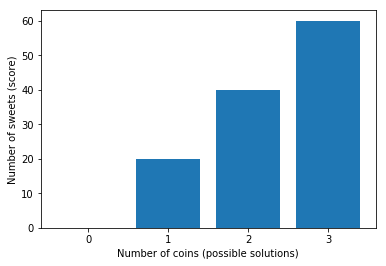

In [3]:
%matplotlib inline

from matplotlib import pyplot

pyplot.bar(results.keys(), results.values())
pyplot.ylabel('Number of sweets (score)')
pyplot.xlabel('Number of coins (possible solutions)')
pyplot.xticks(list(results.keys()));

### Properties:

- Our variable is **discrete**
- The number of solutions is **limited** and **small**
- We can easily **evaluate how good a solution is**

## Linear regression

In [67]:
from matplotlib import pyplot

POINTS = [(1.14, 1.36), (2.89, 2.06), (3.87, 5.11), (4.88, 5.73), (5.66, 7.11), (7.43, 6.77)]

def update(alpha=-1., beta=1.2):
    x, y = zip(*POINTS)
    pyplot.scatter(x, y)
    pyplot.plot((0, max(x)), (alpha, max(x) * beta + alpha), c='r')
    pyplot.xlim(0, None)
    pyplot.ylim(0, max(y) * 1.4)

In [68]:
import ipywidgets

ipywidgets.interact(update);

interactive(children=(FloatSlider(value=-1.0, description='alpha', max=1.0, min=-3.0), FloatSlider(value=1.2, …

In [75]:
def update(alpha=-1., beta=1.2):
    x, y = zip(*POINTS)
    pyplot.scatter(x, y)
    pyplot.plot((0, max(x)), (alpha, max(x) * beta + alpha), c='r')
    pyplot.xlim(0, None)
    pyplot.ylim(0, max(y) * 1.4)
    
    for x, y in POINTS:
        pyplot.plot((x, x), (y, alpha + beta * x), c='green')

In [76]:
import ipywidgets

ipywidgets.interact(update);

interactive(children=(FloatSlider(value=-1.0, description='alpha', max=1.0, min=-3.0), FloatSlider(value=1.2, …

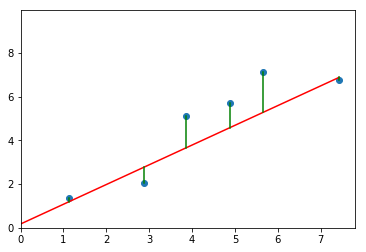

In [77]:
import numpy
import statsmodels.api

x, y = zip(*POINTS)
x = numpy.array(x)
x = statsmodels.api.add_constant(x)
ols = statsmodels.api.OLS(x, y).fit()
alpha, beta = ols.params[0]
update(alpha, beta)

### Properties

- Our variables are **continuous**
- The number of solutions is **infinite**
- There are **no constraints**
- There is an **analytical solution** to compute the optimal

## Logistic regression

In [123]:
from matplotlib import pyplot

CLASS_A = [(2.14, 2.36), (2.89, 2.06), (1.87, 4.11), (2.88, 3.73)]
CLASS_B = [(4.74, 5.02), (5.66, 7.11), (4.43, 6.77), (2.54, 3.01)]


def update(alpha=15., beta=-3.):
    for points, colour in zip((CLASS_A, CLASS_B), ('blue', 'red')):
        x, y = zip(*points)
        pyplot.scatter(x, y, c=colour)
    pyplot.plot((0, max(x)), (alpha, max(x) * beta + alpha), c='green')
    pyplot.xlim(0, None)
    pyplot.ylim(0, max(y) * 1.4)

In [124]:
import ipywidgets

ipywidgets.interact(update);

interactive(children=(FloatSlider(value=15.0, description='alpha', max=45.0, min=-15.0), FloatSlider(value=-3.…

In [127]:
import numpy
import scipy.stats

x, y = numpy.linspace(-10., 10., 100), numpy.linspace(-10., 10., 100)
x, y = numpy.meshgrid(x, y)

normal = scipy.stats.multivariate_normal([0., 0.], [[10., 0], [0, 10.]])

z = -normal.pdf(numpy.dstack((x, y)))

In [128]:
import matplotlib
import ipyvolume

ipyvolume.figure(width=800, height=600)
color = matplotlib.cm.RdYlGn_r((z - z.min()) / z.ptp())
ipyvolume.plot_surface(x, z, y, color=color)
ipyvolume.ylim(-.05, 0.)
ipyvolume.style.box_off()
ipyvolume.style.axes_off()
ipyvolume.show()

### Properties

- There is NO **analytical solution** to compute the optimal
- We can compute the **gradient** (derivative)
- Our cost function is **convex** (no local minima)
- We can be **smart in exploring the search space** toward the global minimum
  - If **second derivative** can be computed, we can use **Newton-methods**

### Implementation (sklearn)

    solver : str, {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default: ‘liblinear’.

    Algorithm to use in the optimization problem.

        - For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
        - For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
        - ‘newton-cg’, ‘lbfgs’ and ‘sag’ only handle L2 penalty, whereas ‘liblinear’ and ‘saga’ handle L1 penalty.

    Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.

## Neural networks

- ANNs are universal function approximators
- They need to be able to approximate non-convex functions
- Convex functions can’t approximate non-convex ones well

In [131]:
import numpy
import scipy.stats

x, y = numpy.linspace(-10., 10., 100), numpy.linspace(-10., 10., 100)
x, y = numpy.meshgrid(x, y)

normal1 = scipy.stats.multivariate_normal([-3., -3.], [[8., 0], [0, 8.]])
normal2 = scipy.stats.multivariate_normal([3., 3.], [[4., 0], [0., 4.]])

z = -normal1.pdf(numpy.dstack((x, y))) + -normal2.pdf(numpy.dstack((x, y)))

In [133]:
import matplotlib
import ipyvolume

ipyvolume.figure(width=800, height=600)
color = matplotlib.cm.RdYlGn_r((z - z.min()) / z.ptp())
ipyvolume.plot_surface(x, z, y, color=color)
ipyvolume.ylim(-.05, 0.)
ipyvolume.style.box_off()
ipyvolume.style.axes_off()
ipyvolume.show()

### Properties

- There is NO **analytical solution** to compute the optimal
- We can compute the **gradient** (derivative)
- Our cost function is NOT **convex**
- We need to be VERY **smart in exploring the search space** to find a reasonable local minimum
  - Stochastic gradient descent
  - Simulated annealing
  - Particle swarm optimisation
  - ...

## Hyperparameter optimisation

![](img/svm.png)

In [86]:
import sklearn.svm

clf = sklearn.svm.SVC(C=1., gamma=1e-4)

In [88]:
import sklearn.model_selection

grid = sklearn.model_selection.GridSearchCV(estimator=sklearn.svm.SVC(),
                                            param_grid={'C': [.01, .1, 1., 10.],
                                                        'gamma': [1e2, 1e3, 1e4, 1e5]})

In [92]:
list(sklearn.model_selection.ParameterGrid(grid.param_grid))

[{'C': 0.01, 'gamma': 100.0},
 {'C': 0.01, 'gamma': 1000.0},
 {'C': 0.01, 'gamma': 10000.0},
 {'C': 0.01, 'gamma': 100000.0},
 {'C': 0.1, 'gamma': 100.0},
 {'C': 0.1, 'gamma': 1000.0},
 {'C': 0.1, 'gamma': 10000.0},
 {'C': 0.1, 'gamma': 100000.0},
 {'C': 1.0, 'gamma': 100.0},
 {'C': 1.0, 'gamma': 1000.0},
 {'C': 1.0, 'gamma': 10000.0},
 {'C': 1.0, 'gamma': 100000.0},
 {'C': 10.0, 'gamma': 100.0},
 {'C': 10.0, 'gamma': 1000.0},
 {'C': 10.0, 'gamma': 10000.0},
 {'C': 10.0, 'gamma': 100000.0}]

Bayesian optimisation

![](img/bayesian_optimisation.png)

### Properties

- We can NOT compute the **gradient** (derivative)
- No information about the shape of our function (convex...)
  - Assumption that **close points have close values**
- We can be VERY **smart in exploring the search space** toward the global minimum

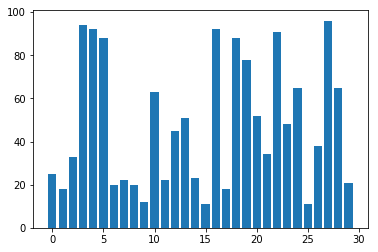

In [141]:
import numpy
from matplotlib import pyplot

size = 30
x = numpy.random.randint(100, size=size)
pyplot.bar(range(size), x);

## Clustering

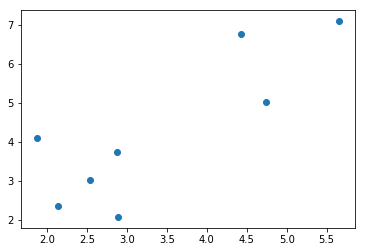

In [143]:
from matplotlib import pyplot

POINTS = [(2.14, 2.36), (2.89, 2.06), (1.87, 4.11), (2.88, 3.73),
          (4.74, 5.02), (5.66, 7.11), (4.43, 6.77), (2.54, 3.01)]

x, y = zip(*POINTS)
pyplot.scatter(x, y);

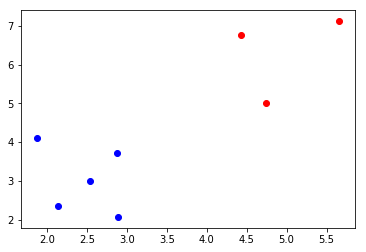

In [145]:
from matplotlib import pyplot

CLUSTER_1 = [(2.14, 2.36), (2.89, 2.06), (1.87, 4.11), (2.88, 3.73), (2.54, 3.01)]
CLUSTER_2 = [(4.74, 5.02), (5.66, 7.11), (4.43, 6.77)]

for points, colour in zip((CLUSTER_1, CLUSTER_2), ('blue', 'red')):
    x, y = zip(*points)
    pyplot.scatter(x, y, color=colour)

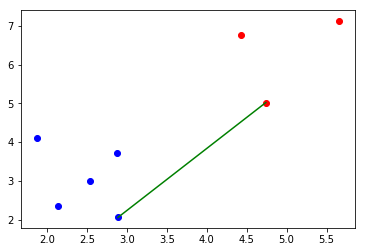

In [149]:
for points, colour in zip((CLUSTER_1, CLUSTER_2), ('blue', 'red')):
    x, y = zip(*points)
    pyplot.scatter(x, y, color=colour)

pyplot.plot(*zip(CLUSTER_1[1], CLUSTER_2[0]), color='green');

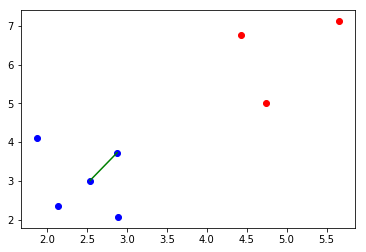

In [151]:
for points, colour in zip((CLUSTER_1, CLUSTER_2), ('blue', 'red')):
    x, y = zip(*points)
    pyplot.scatter(x, y, color=colour)

pyplot.plot(*zip(CLUSTER_1[3], CLUSTER_1[4]), color='green');

### Properties

- **Discrete** variables
  - `{'point_1': 'cluster_A', 'point_2': 'cluster_B'}`
- **Brute force** algorithm only feasible for toy problems
- Only option is to be **smart in exploring the search space** from an algorithmic point of view
  - k-means, hierarchical clustering... 

## Knapsack problem

![](img/knapsack.png)

In [158]:
take_item = [1, 1, 1, 0, 0]
item_value = [1_000, 4_000, 5_000, 5_000, 2_000]
item_weight = [10, 300, 1, 200, 100]

def objective(solution):
    return sum(take * value in take, value in zip(solution, item_value))

def constraint(solution):
    return sum(take * weight in take, weight in zip(solution, item_weight)) <= 400

print(f'Possible solutions: {2 ** 100}')

print(f'Time to compute (1 microsecond per solution): {(2 ** 100) / (1_000_000 * 60 * 60  * 24 * 365.25):.0f} years')

Possible solutions: 1267650600228229401496703205376
Time to compute (1 microsecond per solution): 40169423537538640 years


Again, we need to be **smart in exploring the search space**

Usual solution: **dynamic programming**
- Store intermediate results

## Travelling salesman problem (TSP)

![](img/tsp.png)

**Heuristic methods**

![](img/tsp_heuristic.gif)

Solve a much **easier problem** that returns a **good enough** solution

**Linear programming**

![](img/linear_programming.png)

**Solvers**

Pythoninc form:
```python
p = Problem()

p.x1 = Variable(lower_bound=0., type=float)
p.x2 = Variable(lower_bound=0., type=float)

p.objective = 12 * x1 - 3 * x2

p.constraints.add(x1 + 20 * x2 <= 110)

p.solve()
```

Examples: [Pyomo](https://pyomo.readthedocs.io), [PuLP](https://www.coin-or.org/PuLP/)

**Solvers**

Matrix form:
```python

objective = [12., -7, 34.]

constraints = [[-3.,  0., -1.],
               [ 0.,  2.,  0.],
               [ 8., -4.,  0.]]

Problem.solve(objective, constraints)
```

Example: [CVXOPT](https://cvxopt.org/)

**Solvers**

As many as you can imagine:

- COIN-OR Linear Programming (CLP)
- GNU Linear Programming Kit (GLPK)
- lp_solve
- MINOS
- ...

Many variants: Linear programming, Mixed Integer LP, Convex optimisation...

Many proprietary options too.

## Summary

- Optimisation is a **huge** area

- Most problems can't be solved with **analytical solutions** or **brute force** approaches

- Lots of **algorithms** (and solvers) exist to solve **specific** kinds of problems

- The more **specialised** the algorithm is, the **faster** it will be, and with **better** results:
  - Linear programming < Convex optimisation < Bayesian optimisation

- In most cases want will want **transform** our problem to one of the solved problems

## Resources

- OLS visually (blog): http://setosa.io/ev/ordinary-least-squares-regression/
- Convex optimisation (book): https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf
- Convex optimisation (video lectures): https://www.youtube.com/view_play_list?p=3940DD956CDF0622
- Non-convex optimisation (slides): https://www.cs.cornell.edu/courses/cs6787/2017fa/Lecture7.pdf
- Iterative Methods for Optimization (book): https://archive.siam.org/books/textbooks/fr18_book.pdf
- Gaussian processes / Bayesian optimisation (blog): http://katbailey.github.io/post/gaussian-processes-for-dummies/
- Heuristic algorithms: https://optimization.mccormick.northwestern.edu/index.php/Heuristic_algorithms
- Comparison of open source solvers: https://prod-ng.sandia.gov/techlib-noauth/access-control.cgi/2013/138847.pdf

## Thank you

- datapythonista.github.com
- twitter.com/datapythonista
- linkedin.com/in/datapythonista
- github.com/datapythonista

#### @datapythonista
